# **A Comparative Study of Machine Learning and Deep Learning Techniques for Fake Review Detection**

# **Import statements**

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# **read the csv file**

In [3]:
data = pd.read_csv("finalReview.csv")

In [4]:
data.head()

,Unnamed: 0,Date,URL,Review_Title,Author,Rating,Review_text,Review_helpful,Sentiment,Subjectivity,...,Adv_Count,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Rev_Type
0,0,Reviewed in India on 10 August 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,It s a logitech Definitely worth buying it,Aqib Mehmood,5,A really awesome keyboard i was actually go...,77,0.359722,0.552778,...,6.0,4.0,3.0,2.0,2.0,1.0,9.0,0.706522,13.0,1
1,1,Reviewed in India on 27 March 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Great deal got it for With Lightening ...,Chauhan,4,I know its costly but its worth your money ...,55,0.233125,0.468542,...,10.0,4.0,7.0,2.0,2.0,1.0,6.0,0.666667,16.0,1
2,2,Reviewed in India on 19 December 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Loved it,Smok3y,5,I had been contemplating to buy this for a l...,18,0.338750,0.568750,...,3.0,4.0,7.0,1.0,2.0,0.0,9.0,0.735294,22.0,1
3,3,Reviewed in India on 25 June 2020,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Not a good purchase please read description,Kumar Saharsh,1,SO Very very small keys For fast typers w...,11,0.139083,0.507840,...,6.0,4.0,8.0,1.0,2.0,2.0,5.0,0.687500,22.0,1
4,4,Reviewed in India on 27 October 2018,https://www.amazon.in/Logitech-Prodigy-G213-Ga...,Good only when new,Amazon Customer,2,Good to use keyboard while it is new but it...,15,0.165427,0.698140,...,4.0,2.0,9.0,2.0,1.0,1.0,3.0,0.731343,28.0,0


In [5]:
data.tail()

,Unnamed: 0,Date,URL,Review_Title,Author,Rating,Review_text,Review_helpful,Sentiment,Subjectivity,...,Adv_Count,Pro_Count,Pre_Count,Con_Count,Art_Count,Nega_Count,Aux_Count,Authenticity,AT,Rev_Type
9433,9433,Reviewed in India on 24 November 2020,https://www.amazon.in/OnePlus-inches-Ready-And...,Good,Jayaraj,5,I have using all products of one plus,0,0.000000,0.000000,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.000000,29.0,1
9434,9434,Reviewed in India on 6 November 2020,https://www.amazon.in/OnePlus-inches-Ready-And...,Go for it excellent quality,Santosh yadav,5,Everything is excellent but jio cinema not a...,0,0.400000,0.700000,...,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.071429,24.0,0
9435,9435,Reviewed in India on 14 July 2020,https://www.amazon.in/OnePlus-inches-Ready-And...,Excellent,Stanley Vaz,5,Excellent,0,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,30.0,0
9436,9436,Reviewed in India on 1 February 2021,https://www.amazon.in/OnePlus-inches-Ready-And...,Niceeeee,Tanu,4,I liked this,0,0.600000,0.800000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,30.0,0
9437,9437,Reviewed in India on 29 October 2020,https://www.amazon.in/OnePlus-inches-Ready-And...,One plus super,Naveen Kumar C S,4,Best Tv for good price Thanks for OnePlus,0,0.633333,0.366667,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.875000,32.0,1


# **information about dataset**

In [6]:
data.shape

(9438, 26)

In [7]:
data.isnull().sum()

Unnamed: 0        0
Date              0
URL               0
Review_Title      0
Author            0
Rating            0
Review_text       0
Review_helpful    0
Sentiment         0
Subjectivity      0
Neg_Count         0
Word_Count        0
Unique_words      0
Noun_Count        0
Adj_Count         0
Verb_Count        0
Adv_Count         0
Pro_Count         0
Pre_Count         0
Con_Count         0
Art_Count         0
Nega_Count        0
Aux_Count         0
Authenticity      0
AT                0
Rev_Type          0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9438 entries, 0 to 9437
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9438 non-null   int64  
 1   Date            9438 non-null   object 
 2   URL             9438 non-null   object 
 3   Review_Title    9438 non-null   object 
 4   Author          9438 non-null   object 
 5   Rating          9438 non-null   int64  
 6   Review_text     9438 non-null   object 
 7   Review_helpful  9438 non-null   int64  
 8   Sentiment       9438 non-null   float64
 9   Subjectivity    9438 non-null   float64
 10  Neg_Count       9438 non-null   int64  
 11  Word_Count      9438 non-null   int64  
 12  Unique_words    9438 non-null   int64  
 13  Noun_Count      9438 non-null   float64
 14  Adj_Count       9438 non-null   float64
 15  Verb_Count      9438 non-null   float64
 16  Adv_Count       9438 non-null   float64
 17  Pro_Count       9438 non-null   f

In [10]:
data.describe

<bound method NDFrame.describe of       Unnamed: 0                                   Date  \
0              0    Reviewed in India on 10 August 2018   
1              1     Reviewed in India on 27 March 2018   
2              2  Reviewed in India on 19 December 2018   
3              3      Reviewed in India on 25 June 2020   
4              4   Reviewed in India on 27 October 2018   
...          ...                                    ...   
9433        9433  Reviewed in India on 24 November 2020   
9434        9434   Reviewed in India on 6 November 2020   
9435        9435      Reviewed in India on 14 July 2020   
9436        9436   Reviewed in India on 1 February 2021   
9437        9437   Reviewed in India on 29 October 2020   

                                                    URL  \
0     https://www.amazon.in/Logitech-Prodigy-G213-Ga...   
1     https://www.amazon.in/Logitech-Prodigy-G213-Ga...   
2     https://www.amazon.in/Logitech-Prodigy-G213-Ga...   
3     https://www.ama

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9438 entries, 0 to 9437
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9438 non-null   int64  
 1   Date            9438 non-null   object 
 2   URL             9438 non-null   object 
 3   Review_Title    9438 non-null   object 
 4   Author          9438 non-null   object 
 5   Rating          9438 non-null   int64  
 6   Review_text     9438 non-null   object 
 7   Review_helpful  9438 non-null   int64  
 8   Sentiment       9438 non-null   float64
 9   Subjectivity    9438 non-null   float64
 10  Neg_Count       9438 non-null   int64  
 11  Word_Count      9438 non-null   int64  
 12  Unique_words    9438 non-null   int64  
 13  Noun_Count      9438 non-null   float64
 14  Adj_Count       9438 non-null   float64
 15  Verb_Count      9438 non-null   float64
 16  Adv_Count       9438 non-null   float64
 17  Pro_Count       9438 non-null   f

# **Drop the unknown column**

In [12]:
list = data[["Subjectivity","Neg_Count",'Word_Count',"Unique_words","Noun_Count","Adj_Count",
             "Verb_Count","Adv_Count","Pro_Count","Pre_Count","Con_Count","URL",
             "Review_helpful","Art_Count","Nega_Count","Aux_Count","Unnamed: 0","AT","Authenticity","Sentiment","Date"]]

In [13]:
for i in list:
    data.drop(i,axis=1,inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9438 entries, 0 to 9437
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_Title  9438 non-null   object
 1   Author        9438 non-null   object
 2   Rating        9438 non-null   int64 
 3   Review_text   9438 non-null   object
 4   Rev_Type      9438 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 368.8+ KB


In [15]:
data.shape

(9438, 5)

In [16]:
data.head()

,Review_Title,Author,Rating,Review_text,Rev_Type
0,It s a logitech Definitely worth buying it,Aqib Mehmood,5,A really awesome keyboard i was actually go...,1
1,Great deal got it for With Lightening ...,Chauhan,4,I know its costly but its worth your money ...,1
2,Loved it,Smok3y,5,I had been contemplating to buy this for a l...,1
3,Not a good purchase please read description,Kumar Saharsh,1,SO Very very small keys For fast typers w...,1
4,Good only when new,Amazon Customer,2,Good to use keyboard while it is new but it...,0


In [17]:
data["Rev_Type"].value_counts()

0    5191
1    4247
Name: Rev_Type, dtype: int64

In [18]:
data.isnull().sum()

Review_Title    0
Author          0
Rating          0
Review_text     0
Rev_Type        0
dtype: int64

In [19]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9433    False
9434    False
9435    False
9436    False
9437    False
Length: 9438, dtype: bool

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9438.0,3.769337,1.507947,1.0,3.0,4.0,5.0,5.0
Rev_Type,9438.0,0.449989,0.497519,0.0,0.0,0.0,1.0,1.0


<AxesSubplot:>

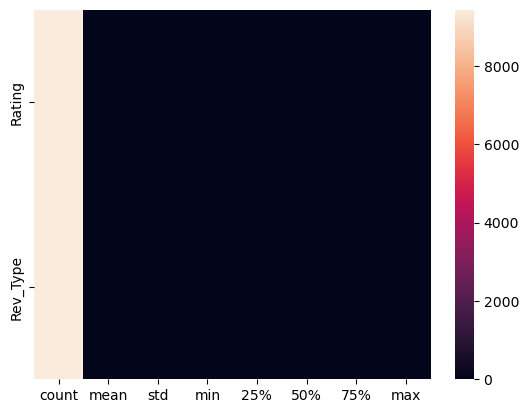

In [21]:
sns.heatmap(data.describe().T)

# **EDA**

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

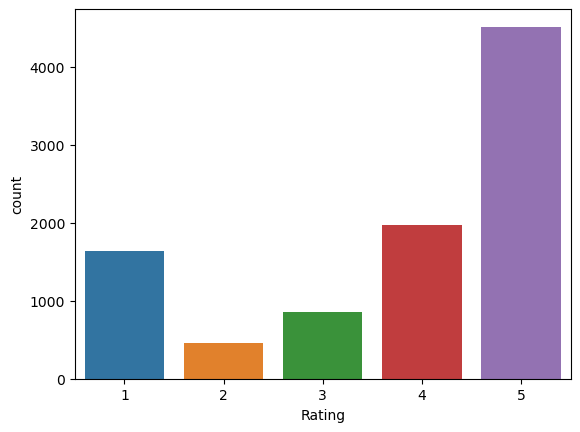

In [22]:
sns.countplot(data['Rating'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9438 entries, 0 to 9437
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_Title  9438 non-null   object
 1   Author        9438 non-null   object
 2   Rating        9438 non-null   int64 
 3   Review_text   9438 non-null   object
 4   Rev_Type      9438 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 368.8+ KB


In [24]:
import plotly.express as px
from plotly import graph_objects as go

In [25]:
fig = px.histogram(data, x='Rev_Type', template='plotly_white', title='Complaint counts by date')
fig.update_xaxes(categoryorder='category descending', title='Date').update_yaxes(title='Number of complaints')
fig.show()

In [26]:
fig = px.histogram(data, x='Rating', template='plotly_white', title='Complaint counts by date')
fig.update_xaxes(categoryorder='category descending', title='Date').update_yaxes(title='Number of complaints')
fig.show()

In [27]:
fig = px.bar(data[:20], x='Rating', y='Rev_Type', title='Counts of top bigrams', template='plotly_white', labels={'ngram': 'Bigram', 'count': 'Count'})
fig.show()

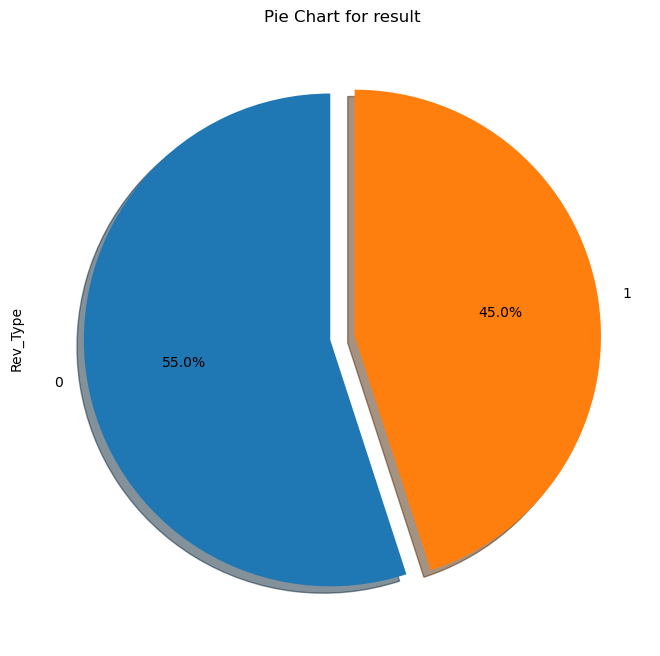

In [28]:
data['Rev_Type'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for result')
plt.show()

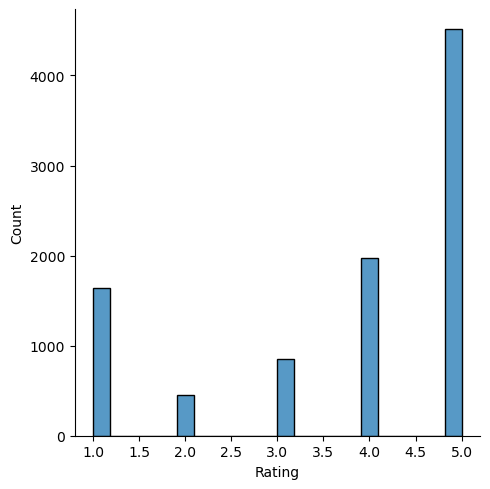

In [29]:
sns.displot(data["Rating"])

# **PREPROCESSING**

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9438 entries, 0 to 9437
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_Title  9438 non-null   object
 1   Author        9438 non-null   object
 2   Rating        9438 non-null   int64 
 3   Review_text   9438 non-null   object
 4   Rev_Type      9438 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 368.8+ KB


In [31]:
data.head()

,Review_Title,Author,Rating,Review_text,Rev_Type
0,It s a logitech Definitely worth buying it,Aqib Mehmood,5,A really awesome keyboard i was actually go...,1
1,Great deal got it for With Lightening ...,Chauhan,4,I know its costly but its worth your money ...,1
2,Loved it,Smok3y,5,I had been contemplating to buy this for a l...,1
3,Not a good purchase please read description,Kumar Saharsh,1,SO Very very small keys For fast typers w...,1
4,Good only when new,Amazon Customer,2,Good to use keyboard while it is new but it...,0


In [32]:
data.drop("Author",axis = 1 ,inplace = True)

In [33]:
data.drop("Rating",axis = 1 ,inplace = True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9438 entries, 0 to 9437
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_Title  9438 non-null   object
 1   Review_text   9438 non-null   object
 2   Rev_Type      9438 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 221.3+ KB


In [35]:
x = data.drop('Rev_Type',axis=1)

In [36]:
x.shape

(9438, 2)

In [37]:
y = data["Rev_Type"]

In [38]:
y.shape

(9438,)

In [39]:
messages=x.copy()

In [40]:
messages['Review_text'][1]

'  I know its costly but its worth your money  Logitech any known branded products LAST LONGer than any random ones   Pros Although its not mechanical  the keys feel very responsive The lights on the keyboard look amazing and CAN be switched off with a hardware button on the keyboard The software perfectly links up with my mouse  which is also Logitech   and feels very seamless Fits great on theAmazonBasics Extended Gaming Mouse PadCons The wrist rest is non removable  which is not a big deal but the material used can will make your wrist sweaty For some reason  the lights on the software keep resetting  noting wrong with the hardware  and always stops when its purple which is funny The media keys do not work with online applications  Like YouTube  Overall  honestly I feel It was worth the full price too  but somehow it was on offer when I was about to order it Thanks Anunay '

In [41]:
messages

,Review_Title,Review_text
0,It s a logitech Definitely worth buying it,A really awesome keyboard i was actually go...
1,Great deal got it for With Lightening ...,I know its costly but its worth your money ...
2,Loved it,I had been contemplating to buy this for a l...
3,Not a good purchase please read description,SO Very very small keys For fast typers w...
4,Good only when new,Good to use keyboard while it is new but it...
...,...,...
9433,Good,I have using all products of one plus
9434,Go for it excellent quality,Everything is excellent but jio cinema not a...
9435,Excellent,Excellent
9436,Niceeeee,I liked this


In [42]:
messages.reset_index(inplace=True)

In [43]:
messages

,index,Review_Title,Review_text
0,0,It s a logitech Definitely worth buying it,A really awesome keyboard i was actually go...
1,1,Great deal got it for With Lightening ...,I know its costly but its worth your money ...
2,2,Loved it,I had been contemplating to buy this for a l...
3,3,Not a good purchase please read description,SO Very very small keys For fast typers w...
4,4,Good only when new,Good to use keyboard while it is new but it...
...,...,...,...
9433,9433,Good,I have using all products of one plus
9434,9434,Go for it excellent quality,Everything is excellent but jio cinema not a...
9435,9435,Excellent,Excellent
9436,9436,Niceeeee,I liked this


In [44]:
import nltk
import re
from nltk.corpus import stopwords

In [45]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ymts0630\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
len(messages)

9438

In [47]:
from nltk.stem.porter import PorterStemmer ##stemming purpose
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Review_text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    
    corpus.append(review)

In [48]:
corpus

['realli awesom keyboard actual go cheap game keyboard like blaze may bit costli trust worth best rgb membran keyboard ever may mechan ever go cheap game keyboard keyboard give premium stealthi look alot game light profilespro durabl nice vibrant color nice qualiti membran key almost everythingcon mani light effect could mechan keyboard',
 'know costli worth money logitech known brand product last longer random one pro although mechan key feel respons light keyboard look amaz switch hardwar button keyboard softwar perfectli link mous also logitech feel seamless fit great theamazonbas extend game mous padcon wrist rest non remov big deal materi use make wrist sweati reason light softwar keep reset note wrong hardwar alway stop purpl funni media key work onlin applic like youtub overal honestli feel worth full price somehow offer order thank anunay',
 'contempl buy long time went numer review compar product similar price rang offer best amongst could review deliv excel condit well pack t

In [49]:
data["clean"] = corpus

In [50]:
data.head()

,Review_Title,Review_text,Rev_Type,clean
0,It s a logitech Definitely worth buying it,A really awesome keyboard i was actually go...,1,realli awesom keyboard actual go cheap game ke...
1,Great deal got it for With Lightening ...,I know its costly but its worth your money ...,1,know costli worth money logitech known brand p...
2,Loved it,I had been contemplating to buy this for a l...,1,contempl buy long time went numer review compa...
3,Not a good purchase please read description,SO Very very small keys For fast typers w...,1,small key fast typer use hand type abl use typ...
4,Good only when new,Good to use keyboard while it is new but it...,0,good use keyboard new difficult possibl clean ...


# **Spliting The Data**

In [51]:
x = data['clean']
y = data['Rev_Type']

In [52]:
x.shape

(9438,)

In [53]:
y.shape

(9438,)

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.3, random_state=42)

In [55]:
from sklearn.feature_extraction.text import HashingVectorizer
hvectorizer = HashingVectorizer(n_features=10000,norm=None,alternate_sign=False,stop_words='english') 
x_train = hvectorizer.fit_transform(x_train).toarray()
x_test = hvectorizer.transform(x_test).toarray()

# **DecisionTreeClassifier**

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
de = DecisionTreeClassifier()

In [58]:
de.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
de_pred = de.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
ac = accuracy_score(y_test,de_pred)

In [62]:
ac

0.807909604519774

**Prediction**

In [63]:
re = ["know costli worth money logitech known brand product last longer random one pro although mechan key feel respons light keyboard look amaz switch hardwar button keyboard softwar perfectli link mous also logitech feel seamless fit great theamazonbas extend game mous padcon wrist rest non remov big deal materi use make wrist sweati reason light softwar keep reset note wrong hardwar alway stop purpl funni media key work onlin applic like youtub overal honestli feel worth full price somehow offer order thank anunay"]

In [64]:
res = hvectorizer.fit_transform(re).toarray()

In [65]:
res

array([[0., 0., 0., ..., 0., 0., 0.]])

In [66]:
out = de.predict(res)

In [67]:
if out == 0:
    print("Bad Review")
else:
    print("Genuine Review")

Genuine Review


In [68]:
out

array([1], dtype=int64)

# **RandomForestClassifier**

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
ren = RandomForestClassifier()

In [71]:
ren.fit(x_train,y_train)

RandomForestClassifier()

In [72]:
r_pred = ren.predict(x_test)

In [73]:
acc = accuracy_score(y_test,r_pred) 

In [74]:
acc

0.8449858757062146

**Prediction**

In [75]:
li = ["know costli worth money logitech known brand product last longer random one pro although mechan key feel respons light keyboard look amaz switch hardwar button keyboard softwar perfectli link mous also logitech feel seamless fit great theamazonbas extend game mous padcon wrist rest non remov big deal materi use make wrist sweati reason light softwar keep reset note wrong hardwar alway stop purpl funni media key work onlin applic like youtub overal honestli feel worth full price somehow offer order thank anunay"]

In [76]:
res = hvectorizer.fit_transform(li).toarray()

In [77]:
out = ren.predict(res)

In [78]:
out

array([1], dtype=int64)

In [79]:
if out == 0:
    print("Bad Review")
else:
    print("Genuine Review")

Genuine Review


# **LogisticRegression**

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
lr = LogisticRegression()

In [82]:
lr.fit(x_train,y_train)

C:\Users\ymts0630\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [83]:
lr_pred = lr.predict(x_test)

In [84]:
lr_ac = accuracy_score(y_test,lr_pred)

In [85]:
lr_ac

0.826271186440678

**Prediction**

In [86]:
li = ["know costli worth money logitech known brand product last longer random one pro although mechan key feel respons light keyboard look amaz switch hardwar button keyboard softwar perfectli link mous also logitech feel seamless fit great theamazonbas extend game mous padcon wrist rest non remov big deal materi use make wrist sweati reason light softwar keep reset note wrong hardwar alway stop purpl funni media key work onlin applic like youtub overal honestli feel worth full price somehow offer order thank anunay"]

In [87]:
res = hvectorizer.fit_transform(li).toarray()

In [88]:
out = lr.predict(res)

In [89]:
out

array([1], dtype=int64)

In [90]:
if out == 0:
    print("Bad Review")
else:
    print("Genuine Review")

Genuine Review


# **Support Vector Machine(SVM)**

In [91]:
from sklearn.svm import SVC

In [92]:
sv = SVC()

In [93]:
sv.fit(x_train,y_train)

SVC()

In [94]:
sv_pred = sv.predict(x_test)

In [95]:
ac1 = accuracy_score(y_test,sv_pred)

In [96]:
ac1

0.8485169491525424

**Prediction**

In [97]:
li = ["know costli worth money logitech known brand product last longer random one pro although mechan key feel respons light keyboard look amaz switch hardwar button keyboard softwar perfectli link mous also logitech feel seamless fit great theamazonbas extend game mous padcon wrist rest non remov big deal materi use make wrist sweati reason light softwar keep reset note wrong hardwar alway stop purpl funni media key work onlin applic like youtub overal honestli feel worth full price somehow offer order thank anunay"]

In [98]:
res = hvectorizer.fit_transform(li).toarray()

In [99]:
out = sv.predict(res)

In [100]:
out

array([1], dtype=int64)

In [101]:
if out == 0:
    print("Bad Review")
else:
    print("Genuine Review")    

Genuine Review


# **naive_bayes**

In [102]:
from sklearn.naive_bayes import GaussianNB

In [103]:
nb = GaussianNB()

In [104]:
nb.fit(x_train,y_train)

GaussianNB()

In [105]:
n_pred = nb.predict(x_test)

In [106]:
ac2 = accuracy_score(y_test,n_pred)

In [107]:
ac2

0.6069915254237288

In [108]:
out = nb.predict(res)

In [109]:
out

array([1], dtype=int64)

**Prediction**

In [110]:
if out == 0:
    print("Bad Review")
else:
    print("Genuine Review") 

Genuine Review


# **XGBoost**

In [111]:
from xgboost import XGBClassifier

In [112]:
xg = XGBClassifier()

In [113]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [114]:
x_pred = xg.predict(x_test)

In [115]:
ac3 = accuracy_score(y_test,x_pred)

In [116]:
ac3

0.8527542372881356

**Prediction**

In [117]:
out = xg.predict(res)

In [118]:
out

array([1])

In [119]:
if out == 0:
    print("Bad Review")
else:
    print("Genuine Review") 

Genuine Review


# **Artificial neural networks**

In [120]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential([
Dense( units = 16, activation = 'relu'),
Dense(units = 24, activation = 'relu'),
Dropout(0.5),
Dense(units = 20, activation = 'relu'),
Dense(units = 24, activation = 'relu'),
Dense(units =1, activation = 'sigmoid'),]) 

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 15, epochs = 10)

score = model.evaluate(x_test,y_test)
score

Epoch 1/10
441/441 [==============================] - 4s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5495
Epoch 2/10
441/441 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5500
Epoch 3/10
441/441 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5500
Epoch 4/10
441/441 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5500
Epoch 5/10
441/441 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5500
Epoch 6/10
441/441 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5500
Epoch 7/10
441/441 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5500
Epoch 8/10
441/441 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5500
Epoch 9/10
441/441 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5500
Epoch 10/10
89/89 [==============================] - 0s 2ms/step

[0.0, 0.5501412153244019]

In [121]:
score

[0.0, 0.5501412153244019]

In [138]:
scor = 0.5501412153244019

In [139]:
scor

0.5501412153244019

# **Long Short Term Memory (LSTM)**

In [122]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
import re

In [123]:
# Now tokenizing the text column    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['Review_Title'].values)
X = tokenizer.texts_to_sequences(data['Review_Title'].values)
X = pad_sequences(X)
X[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    8,   41,   21,  258,  410,   29,  102,    8],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   30,  156,  157,    8,    3,   33, 1420,  156]])

In [124]:
#Hereby I declare the train and test dataset.
Y = pd.get_dummies(data['Rev_Type']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7550, 31) (7550, 2)
(1888, 31) (1888, 2)


In [125]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 31, 128)           256000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 31, 128)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense_5 (Dense)             (None, 2)                 394       
                                                                 
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [126]:
batch_size = 128
model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 1)

Epoch 1/10
59/59 [==============================] - 17s 219ms/step - loss: 0.6663 - accuracy: 0.5850
Epoch 2/10
59/59 [==============================] - 12s 207ms/step - loss: 0.6317 - accuracy: 0.6495
Epoch 3/10
59/59 [==============================] - 12s 195ms/step - loss: 0.6042 - accuracy: 0.6777
Epoch 4/10
59/59 [==============================] - 12s 201ms/step - loss: 0.5836 - accuracy: 0.6992
Epoch 5/10
59/59 [==============================] - 13s 215ms/step - loss: 0.5665 - accuracy: 0.7034
Epoch 6/10
59/59 [==============================] - 14s 231ms/step - loss: 0.5524 - accuracy: 0.7213
Epoch 7/10
59/59 [==============================] - 15s 249ms/step - loss: 0.5393 - accuracy: 0.7220
Epoch 8/10
59/59 [==============================] - 11s 194ms/step - loss: 0.5246 - accuracy: 0.7340
Epoch 9/10
59/59 [==============================] - 11s 192ms/step - loss: 0.5123 - accuracy: 0.7405
Epoch 10/10
59/59 [==============================] - 11s 181ms/step - loss: 0.5046 - accura

In [140]:
Lstm_acc = 0.7448

In [141]:
Lstm_acc

0.7448

# **CNN**

In [130]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D,Flatten,Dropout,Dense

In [131]:
(X_train,y_train) , (X_test,y_test)=mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 
print(X_train.shape)
print(X_test.shape)
X_train=X_train/255
X_test=X_test/255

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [135]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 16ms/step - loss: 0.1499 - accuracy: 0.9567
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0539 - accuracy: 0.9833
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0358 - accuracy: 0.9885
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0241 - accuracy: 0.9927
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0166 - accuracy: 0.9945
Epoch 6/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0113 - accuracy: 0.9966
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0096 - accuracy: 0.9971
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0070 - accuracy: 0.9975
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0055 - accuracy: 0.9983
Epoch 10/10
1875/1875 [==============================] - 28s 15m

In [136]:
Cn=model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0610 - accuracy: 0.9862


In [137]:
Cn

[0.06103065237402916, 0.9861999750137329]

In [142]:
Cn = 0.9861999750137329

# **Accurecy Graph of all The Algorithm**

In [152]:
Dataframe = pd.DataFrame({'Modules':["DT","RF","LR","SVM","NB","XGB","ANN","LSTM","CNN"],
                          "Accurecy":[ac*100,acc*100,lr_ac*100,ac1*100,ac2*100,ac3*100,scor*100,Lstm_acc*100,Cn*100]})

In [153]:
Dataframe

,Modules,Accurecy
0,DT,80.790960
1,RF,84.498588
2,LR,82.627119
3,SVM,84.851695
4,NB,60.699153
5,XGB,85.275424
6,ANN,55.014122
7,LSTM,74.480000
8,CNN,98.619998


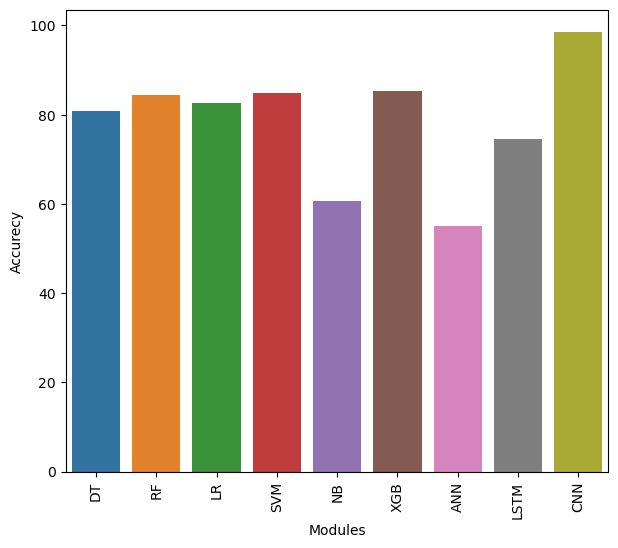

In [154]:
plt.figure(figsize=(7,6))
sns.barplot(y=Dataframe.Accurecy,x=Dataframe.Modules)
plt.xticks(rotation='vertical')
plt.show()